In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv("weight-height.csv")
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [3]:
df.Weight

0       241.893563
1       162.310473
2       212.740856
3       220.042470
4       206.349801
           ...    
9995    136.777454
9996    170.867906
9997    128.475319
9998    163.852461
9999    113.649103
Name: Weight, Length: 10000, dtype: float64

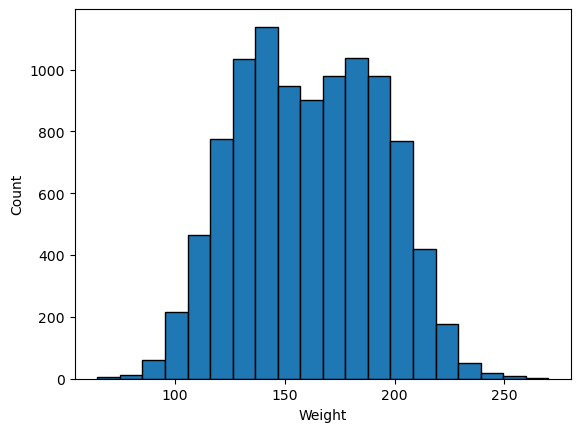

In [53]:
plt.hist(df.Weight,bins=20,edgecolor='black')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.show()

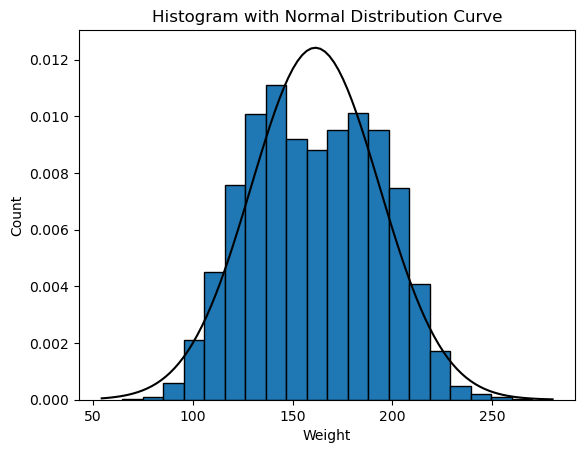

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm



plt.hist(df.Weight, bins=20, density=True,edgecolor='black')

mu, std = norm.fit(df.Weight)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, color='k')

plt.xlabel('Weight')
plt.ylabel('Count')
plt.title('Histogram with Normal Distribution Curve')
plt.show()

In [5]:
df.Weight.describe()

count    10000.000000
mean       161.440357
std         32.108439
min         64.700127
25%        135.818051
50%        161.212928
75%        187.169525
max        269.989699
Name: Weight, dtype: float64

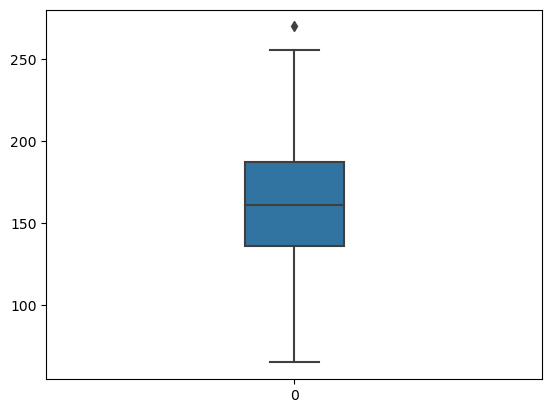

In [17]:
# Visualize Outliers
import seaborn as sns
sns.boxplot(df['Weight'],width=0.2)
plt.show()

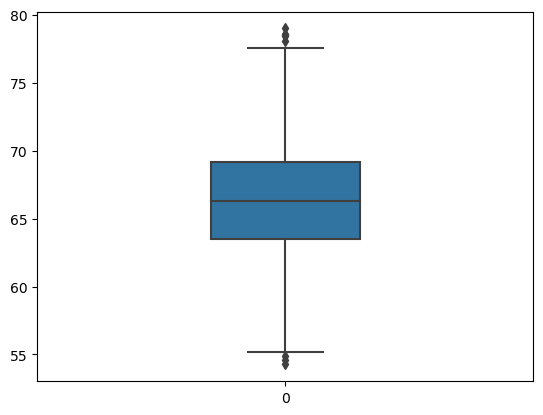

In [10]:
sns.boxplot(df['Height'],width=0.3)
plt.show()

In [14]:
#Back to weight
#Get outlier values
upper =df.Weight.mean()+3*df.Weight.std()
lower =df.Weight.mean()-3*df.Weight.std()
upper,lower

(257.7656738523894, 65.11503981327212)

In [19]:
#remove the outlier valuess and store the rest in newdataframe
new_df = df[(df.Weight<upper) &(df.Weight>lower)]
new_df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [21]:
df['zscore'] = (df.Weight -df.Weight.mean())/df.Weight.std()
df.head()

,Gender,Height,Weight,zscore
0,Male,73.847017,241.893563,2.505672
1,Male,68.781904,162.310473,0.027099
2,Male,74.110105,212.740856,1.597726
3,Male,71.730978,220.042470,1.825131
4,Male,69.881796,206.349801,1.398680


In [28]:
df[df.zscore>3]

,Gender,Height,Weight,zscore
2014,Male,78.998742,269.989699,3.380711


In [23]:
df[df.zscore<-3]

,Gender,Height,Weight,zscore
9285,Female,54.263133,64.700127,-3.012922
